In [1]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
importlib.reload(ps)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'


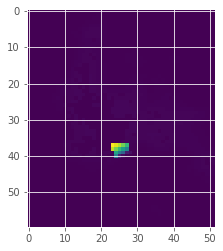

In [2]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
data = pd.read_csv("th100_atol_15_dirdelta_1.csv")
variogram_set = np.array(data.iloc[:,3:])


#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)

#EAM2= np.zeros(np.shape(EAM))

#EAM2 = EAM

#EAM2[EAM2==4]=20



#EAM = EAM2


#EAM[37][23]+=1

nonsat = ps.desaturate(luminance,th=62)


variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
coords = np.array(data.iloc[:,1:3])


NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
sensitivity = ps.f5(NLTI,EAM,65)


aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,coords)


aptitude.selectFitnessFunction("max")
f = aptitude.f

X = np.array([37,23])
f(X)

plt.imshow(sensitivity)

In [10]:
variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])

In [18]:
data

,Unnamed: 0,coordsy,coordsx,0,1,2,3,4,5,6,...,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119
0,0,0,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,1579,58,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1580,1580,58,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,1581,58,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,1582,58,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


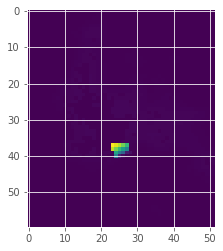

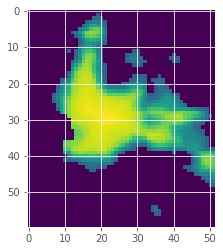

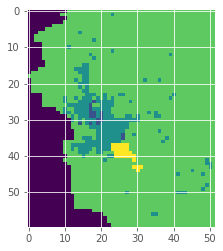

In [129]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(sensitivity)
fig.savefig('sensitivity.eps', format='eps', dpi=100)

fig, ax = plt.subplots()
ax.imshow(nonsat)
fig.savefig('NTLI.eps', format='eps', dpi=100)

fig, ax = plt.subplots()
ax.imshow(EAM)
fig.savefig('EAM.eps', format='eps', dpi=100)

In [5]:
plt.savefig('destination_path.eps', format='eps')

<Figure size 432x288 with 0 Axes>

10
Search Space Boundaries: [[ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]]
 The best solution found:                                                                           
 [24. 16. 31. 22. 29. 24. 38. 16. 31. 38. 37. 43. 38. 26.  6. 18. 41. 49.
 25. 38.]

 Objective function:
 -18003298499.84339


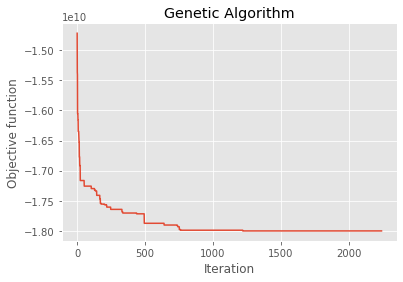

In [173]:
r2 = list([])
results = list([])
for n_sensors in range(10,11):
    print(n_sensors)


    #variable ranges, 2 ranges per sensor position (dim*n_sensors) 
    varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
    print("Search Space Boundaries:", varbound)

    dim = len(varbound)

    #algorithms_parameters={'max_num_iteration': None, 'population_size': 500, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}

    model=ga(function=f,
             dimension=dim,
             algorithm_parameters={'max_num_iteration': None, 'population_size': 1000, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None},
             variable_type='int',
             variable_boundaries=varbound)

    

    model.run()
    r2.append(model.output_dict["function"])
    results.append(model.output_dict["variable"])
    

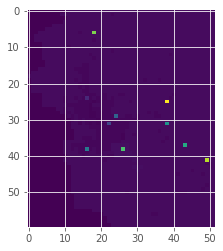

In [184]:
for i in range(1):
    
    X = results[i]
    IMGP = aptitude.showPositions(X)
    plt.imshow(IMGP*10+EAM)
    plt.show()
    



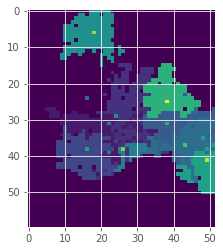

In [213]:
M = aptitude.coverage2(X)

M2 = np.argmax(M,axis=0)

plt.imshow(np.argmax(M,axis=0)+(IMGP>0)*5)

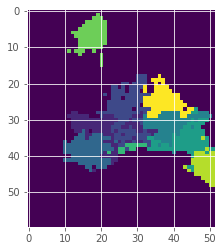

In [207]:
plt.imshow((nonsat>0)*np.argmax(M,axis=0))

In [175]:
sensor_list = X.reshape(n_sensors,2) 


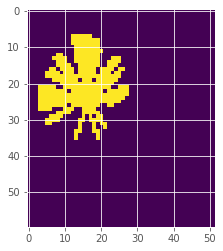

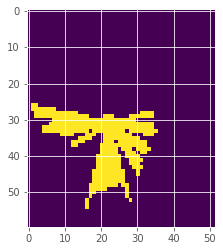

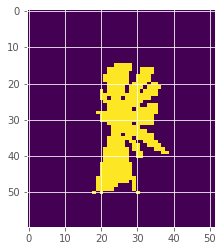

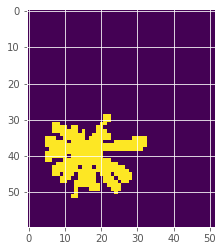

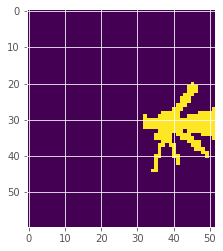

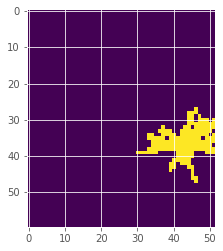

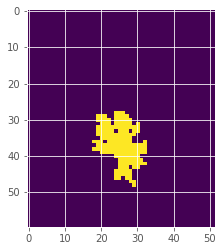

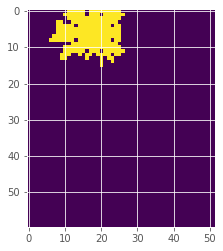

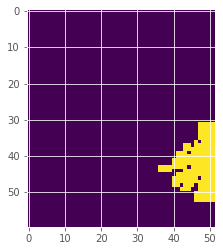

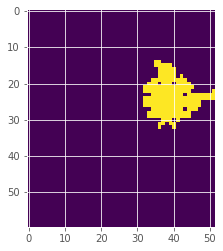

In [176]:
zeros = np.zeros(NLTI.shape)
for i in sensor_list:    
    ix = aptitude.validate_coordinates(i[0],i[1])
        
    cover = aptitude.local_variograms[ix]
    plt.imshow(cover[0]>0)
    zeros += cover[0]>0
    plt.show()


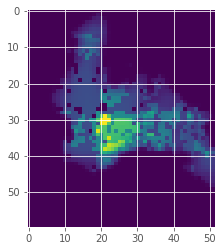

In [179]:
plt.imshow((zeros)*NLTI)

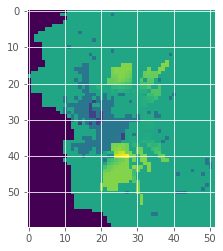

In [149]:
ix = aptitude.validate_coordinates(30,25)
cover = aptitude.local_variograms[ix]

plt.imshow(cover[0]+EAM*2000)

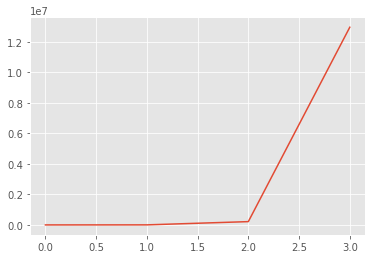

In [114]:
V = np.arange(1,5)
c=60
plt.plot(c**V)

In [115]:
c**V

array([      60,     3600,   216000, 12960000])

In [10]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

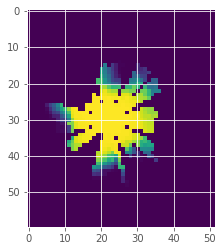

In [16]:
ix = aptitude.validate_coordinates(30,22)
coverage = np.zeros(aptitude.NLTI.shape)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[coordinates[0]][coordinates[1]]
tvar = aptitude.local_variograms[ix][0]

outofrange = (tvar==0)*(np.max(NLTI)**2/2)
tvar[coordinates[0]][coordinates[1]]=0

lb = (np.max(NLTI))**2/2

M = tvar+outofrange


W = (-M+lb)/lb
plt.imshow(W)




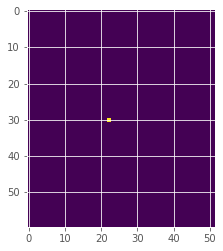

In [21]:
plt.imshow(W==1)

In [ ]:
plt.imshow(tvar==0)

tvar[tvar==0]=np.max(aptitude.NLTI)**2/2

1503039.3495531052


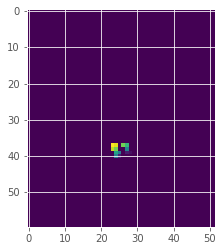

In [12]:
tvar_norm = NormalizeData(tvar)


plt.imshow(((-tvar_norm+1)>0)*sensitivity)
print(np.sum(((-tvar_norm+1)>0)*sensitivity))

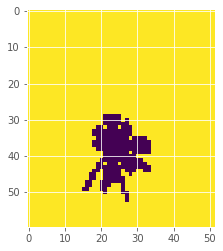

In [13]:
ix = aptitude.validate_coordinates(37,23)
coverage = np.zeros(aptitude.NLTI.shape)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[coordinates[0]][coordinates[1]]
tvar = aptitude.local_variograms[ix][0]
plt.imshow(tvar==0)

tvar[tvar==0]=np.max(aptitude.NLTI)**2/2


1951073.2221549335


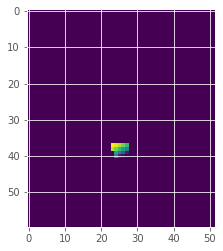

In [131]:
tvar_norm = NormalizeData(tvar)


plt.imshow(((-tvar_norm+1)>0)*sensitivity)
print(np.sum(((-tvar_norm+1)>0)*sensitivity))

In [83]:
ix = (37,23)

coverage = np.zeros(aptitude.NLTI.shape)
coordinates = aptitude.coordinates[ix][0]
pi = aptitude.NLTI[coordinates[0]][coordinates[1]]
tvar = aptitude.local_variograms[ix][0]
plt.imshow(tvar==0)

tvar[tvar==0]=np.max(aptitude.NLTI)**2/2

3041425.089341979

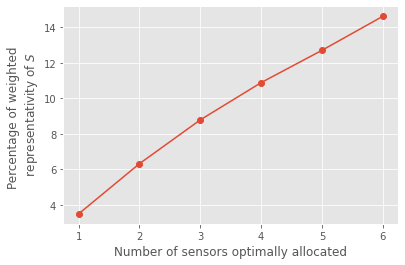

In [49]:
plt.plot(np.arange(1,7),-np.array(r2),"-o")
plt.xlabel("Number of sensors optimally allocated")
plt.ylabel("Percentage of weighted \n representativity of $S$ ")
plt.show()






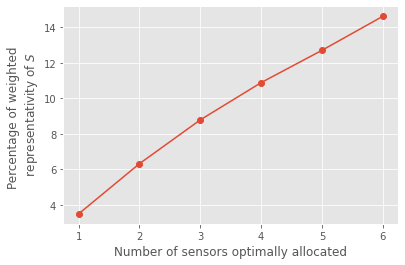

In [57]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,7),-np.array(r2),"-o")
ax.set_xlabel("Number of sensors optimally allocated")
ax.set_ylabel("Percentage of weighted \n representativity of $S$ ")

fig.savefig('wrepresentativity.eps', format='eps', dpi=100)



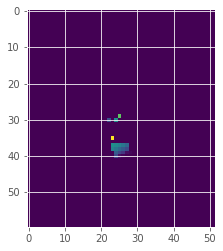

In [141]:
X = model.output_dict["variable"]
X = results[3]
P = aptitude.showPositions(X)
plt.imshow(P*np.max(sensitivity)/2+sensitivity)
plt.show()

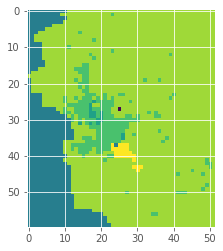

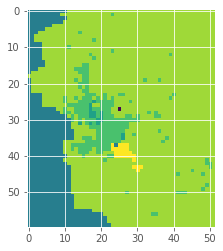

In [13]:
EAM = ps.readIMG(niveles,invert=True)
plt.imshow( (1-P)*EAM )



fig, ax = plt.subplots()
ax.imshow( (1-P)*EAM)
fig.savefig('result_over_EAM.eps', format='eps', dpi=100)


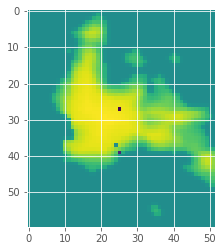

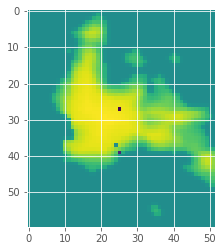

In [121]:
NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
plt.imshow( (1-P)*NLTI )


fig, ax = plt.subplots()
ax.imshow((1-P)*NLTI)
fig.savefig('result_over_NLTI.eps', format='eps', dpi=100)

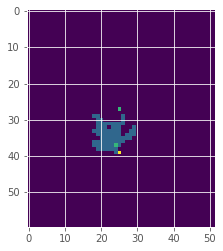

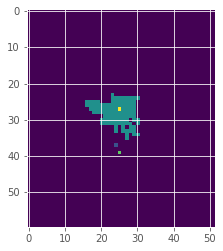

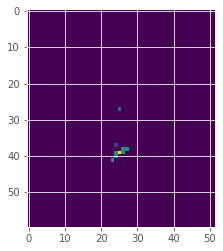

In [122]:
cover = np.zeros(NLTI.shape)
for i in range(n_sensors):
    cover = ((aptitude.coverage(X)[i]>0))*(i+1)
    
    fig, ax = plt.subplots()
    ax.imshow(cover+P)
    fig.savefig('roi_'+str(i)+'.eps', format='eps', dpi=100)


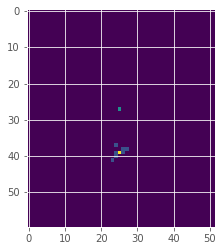

In [123]:
plt.imshow(1*(cover>0)+P)

In [124]:
EAM[X[0]][X[1]]=0
EAM[X[2]][X[3]]=0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
y = int(X[0])
x = int(X[1])
EAM[y][x] = 0

In [ ]:



fig, ax = plt.subplots()
ax.imshow(EAM)
fig.savefig('res01_example.eps', format='eps', dpi=100)

In [ ]:
cover = (NLTI*(aptitude.coverage(X)[0]>0))

cover[y][x]=80
plt.imshow((cover>0)*EAM)


fig, ax = plt.subplots()
ax.imshow((cover>0)*EAM)
fig.savefig('res01_example_b.eps', format='eps', dpi=100)

In [ ]:
NLTI[y][x]=0
plt.imshow((cover>0)*NLTI)




fig, ax = plt.subplots()
ax.imshow((cover>0)*NLTI)
fig.savefig('res01_example_c.eps', format='eps', dpi=100)

In [ ]:
C = aptitude.coverage(X)

In [ ]:
plt.imshow(C[0])

13.956670759565526


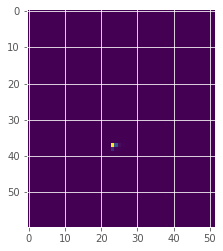

In [8]:
def explicability(X,S):
    n_sensors = int(len(X)/2)
    sensor_list = X.reshape(n_sensors,len(S.shape))
    
    coverage = np.zeros((n_sensors,S.shape[0],S.shape[1]))
    
    for i,s in enumerate(sensor_list):
        
        sy,sx = s[0],s[1]
        
        ix = aptitude.validate_coordinates(sy,sx)
        coverage[i] = np.zeros(S.shape)
        
        v = aptitude.local_variograms[ix]
        M = v>0
        if len(ix)>0: 
            
            map0to1 = 1/(1+v) 
            coverage[i] = map0to1*M
    

    return coverage

E = explicability(X,sensitivity)
T = np.sum(sensitivity)

C = np.max(E,axis=0)*sensitivity

plt.imshow(np.max(E,axis=0)*sensitivity)

print(100*np.sum(C)/T)





In [ ]:
X

In [24]:
ix = aptitude.validate_coordinates(39,25)

In [26]:
v = aptitude.local_variograms[ix]

In [47]:
(v[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

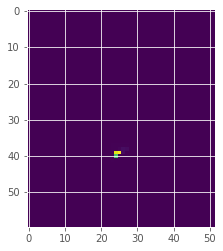

In [64]:
M= v[0]>0
P = 1/(1+v[0])
plt.imshow(P*M*sensitivity) 

In [66]:
np.sum(sensitivity)

140466114.26891884

In [73]:
T = np.sum(sensitivity)

In [78]:
(np.sum(P*M*sensitivity)/T)*100

2.6077766589682474

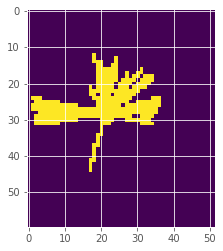

In [75]:
v = variograms[800]



plt.imshow(v>0)

In [15]:
r2

[-2005299.319098516]

In [37]:
X = results[0]
n_sensors = int(len(X)/2)
sensor_list = X.reshape(n_sensors,len(NLTI.shape))
coverage = np.zeros((n_sensors,NLTI.shape[0],NLTI.shape[1]))
for i,s in enumerate(sensor_list):
    sy,sx = s[0],s[1]
    ix = aptitude.validate_coordinates(sy,sx)

    coverage[i] = np.zeros(NLTI.shape)
    if len(ix)>0:
        coordinates = aptitude.coordinates[ix][0]
        tvar = aptitude.local_variograms[ix][0]
        nltirange = np.max(NLTI)/2
        outofrange = (tvar==0)*(nltirange**2/2)
        tvar[coordinates[0]][coordinates[1]]=0
        M = tvar+outofrange
        
        

In [40]:
pi

60.077532628977366